In [1]:
# useful to autoreload the module without restarting the kernel
%load_ext autoreload
%autoreload 2

In [2]:
from mppi import InputFiles as I, Calculators as C
import os

In [3]:
omp = 1
mpi_run = 'mpirun -np 8'

# Analysis of the band structure with pw

In [4]:
run_dir = 'Pw_bands'

We compute the band structure of Silicon and Gallium arsenide using the tools for QuantumESPRESSO

# Pw band structure of GaAs (without SO interaction)

The first step consists in a scf computation 

In [5]:
scf_prefix = 'gaas_scf'
bands_prefix = 'gaas_bands'

In [6]:
inp = I.PwInput(file='IO_files/gaas_scf.in')
inp.set_prefix(scf_prefix)
inp.set_energy_cutoff(60)
inp.set_kpoints(points=[6,6,6])
inp

{'control': {'verbosity': "'high'",
  'pseudo_dir': "'../pseudos'",
  'calculation': "'scf'",
  'prefix': "'gaas_scf'"},
 'system': {'occupations': "'fixed'",
  'ibrav': '2',
  'celldm(1)': '10.677',
  'ntyp': '2',
  'nat': '2',
  'ecutwfc': 60},
 'electrons': {'conv_thr': '1e-08'},
 'ions': {},
 'cell': {},
 'atomic_species': {'Ga': ['69.72', 'Ga_hamlu.fhi.UPF'],
  'As': ['74.92', 'As_hamlu.fhi.UPF']},
 'atomic_positions': {'type': 'crystal',
  'values': [['Ga', [0.0, 0.0, 0.0]], ['As', [0.25, 0.25, 0.25]]]},
 'kpoints': {'type': 'automatic', 'values': ([6, 6, 6], [0.0, 0.0, 0.0])},
 'cell_parameters': {},
 'file': 'IO_files/gaas_scf.in'}

In [7]:
code = C.QeCalculator(omp=omp,mpi_run=mpi_run,skip=True)

Initialize a QuantumESPRESSO calculator with OMP_NUM_THREADS=1 and command mpirun -np 8 pw.x


In [8]:
code.run(input=inp,run_dir=run_dir,name=scf_prefix)

Create the sub-directory 'Pw_bands'
Run directory Pw_bands
Executing command: mpirun -np 8 pw.x -inp gaas_scf.in > gaas_scf.log


'Pw_bands/gaas_scf.save/data-file-schema.xml'

Now we perform the nscf computation specifying the kpoints on a path. 

To define the path we write the coordinates of the high symmetry points (using the tpiba_b type of
pw) and we make usage of the function build_kpath

In [9]:
G = [0.,0.,0.]
X = [1.,0.,0.]
L = [0.5,0.5,0.5]
W = [1.0,0.5,0.]
K = [0.75,0.75,0.]

# useful to label the high-sym point on the path
high_sym = {'X':X,'L':L,'G':G,'W':W} 

In [10]:
from mppi import Utilities as U

In [11]:
klist = U.build_kpath(L,G,X,W,G,numstep=30)
klist

[[0.5, 0.5, 0.5, 30],
 [0.0, 0.0, 0.0, 30],
 [1.0, 0.0, 0.0, 30],
 [1.0, 0.5, 0.0, 30],
 [0.0, 0.0, 0.0, 0]]

In [12]:
inp.set_nscf(8)
inp.set_prefix(bands_prefix)
inp.set_kpoints(type='tpiba_b',path=klist)
#inp

In [13]:
results = code.run(input=inp,run_dir=run_dir,name='bands',source_dir=os.path.join(run_dir,scf_prefix)+'.save')

Copy source_dir Pw_bands/gaas_scf.save in the Pw_bands/gaas_bands.save
Run directory Pw_bands
Executing command: mpirun -np 8 pw.x -inp bands.in > bands.log


Once that the computation is over we can create an instance of PwBands

In [14]:
bands = U.PwBands(results,high_sym)

The class contains some methods that return the bands, the kpath or the position of the high symmetry points on the path

In [15]:
bands.get_high_sym_positions()

(['X', 'L', 'G', 'G', 'W'],
 [1.8660254037844377,
  0.0,
  0.8660254037844385,
  3.48405939253433,
  2.366025403784436])

It contains also a plot method that show the band structure

In [16]:
import matplotlib.pyplot as plt

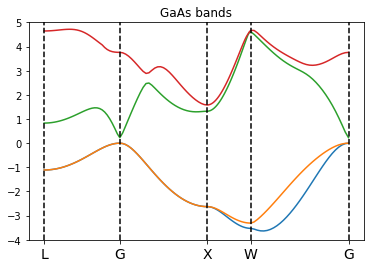

In [17]:
%matplotlib inline
plt.title('GaAs bands')
plt.ylim(-4,5)
bands.plot(plt,selection=[2,3,4,5],convert_eV=True)

# Band structure of Silicon

The first step consists in a scf computation 

In [18]:
scf_prefix = 'si_scf'
bands_prefix = 'si_bands'

In [19]:
inp = I.PwInput(file='IO_files/si_scf.in')
inp.set_prefix(scf_prefix)
inp.set_energy_cutoff(60)
inp.set_kpoints(points=[6,6,6])
inp

{'control': {'verbosity': "'high'",
  'pseudo_dir': "'../pseudos'",
  'calculation': "'scf'",
  'prefix': "'si_scf'"},
 'system': {'force_symmorphic': '.true.',
  'occupations': "'fixed'",
  'ibrav': '2',
  'celldm(1)': '10.3',
  'ntyp': '1',
  'nat': '2',
  'ecutwfc': 60},
 'electrons': {'conv_thr': '1e-08'},
 'ions': {},
 'cell': {},
 'atomic_species': {'Si': ['28.086', 'Si.pbe-mt_fhi.UPF']},
 'atomic_positions': {'type': 'crystal',
  'values': [['Si', [0.125, 0.125, 0.125]], ['Si', [-0.125, -0.125, -0.125]]]},
 'kpoints': {'type': 'automatic', 'values': ([6, 6, 6], [0.0, 0.0, 0.0])},
 'cell_parameters': {},
 'file': 'IO_files/si_scf.in'}

In [20]:
code = C.QeCalculator(omp=omp,mpi_run=mpi_run,skip=True)

Initialize a QuantumESPRESSO calculator with OMP_NUM_THREADS=1 and command mpirun -np 8 pw.x


In [21]:
code.run(input=inp,run_dir=run_dir,name=scf_prefix)

Run directory Pw_bands
Executing command: mpirun -np 8 pw.x -inp si_scf.in > si_scf.log


'Pw_bands/si_scf.save/data-file-schema.xml'

Now we perform the nscf computation specifying the kpoints on a path. 

To define the path we write the coordinates of the high symmetry points (using the tpiba_b type of
pw) and we make usage of the function build_kpath

In [22]:
G = [0.,0.,0.]
X = [1.,0.,0.]
L = [0.5,0.5,0.5]
W = [1.0,0.5,0.]
K = [0.75,0.75,0.]

# useful to label the high-sym point on the path
high_sym = {'X':X,'L':L,'G':G,'W':W} 

In [23]:
from mppi import Utilities as U

In [24]:
klist = U.build_kpath(L,G,X,W,G,numstep=30)
klist

[[0.5, 0.5, 0.5, 30],
 [0.0, 0.0, 0.0, 30],
 [1.0, 0.0, 0.0, 30],
 [1.0, 0.5, 0.0, 30],
 [0.0, 0.0, 0.0, 0]]

In [26]:
inp.set_nscf(8)
inp.set_prefix(bands_prefix)
inp.set_kpoints(type='tpiba_b',path=klist)
#inp

In [27]:
results = code.run(input=inp,run_dir=run_dir,name='bands',source_dir=os.path.join(run_dir,scf_prefix)+'.save')

Copy source_dir Pw_bands/si_scf.save in the Pw_bands/si_bands.save
Run directory Pw_bands
Executing command: mpirun -np 8 pw.x -inp bands.in > bands.log


Once that the computation is over we can create an instance of PwBands

In [28]:
bands = U.PwBands(results,high_sym)

The class contains some methods that return the bands, the kpath or the position of the high symmetry points on the path

In [29]:
bands.get_high_sym_positions()

(['X', 'L', 'G', 'G', 'W'],
 [1.8660254037844377,
  0.0,
  0.8660254037844385,
  3.48405939253433,
  2.366025403784436])

It contains also a plot method that show the band structure

In [30]:
import matplotlib.pyplot as plt

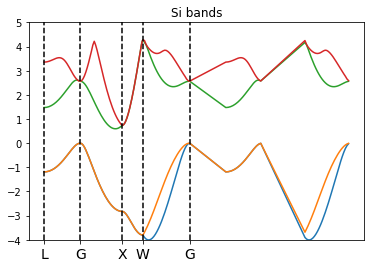

In [32]:
%matplotlib inline
plt.title('Si bands')
plt.ylim(-4,5)
bands.plot(plt,selection=[2,3,4,5],convert_eV=True)